In [2]:
import numpy as np
import matplotlib as mpl  # Importar matplotlib como mpl
import matplotlib.pyplot as plt  # Importar pyplot como plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
base_dir = r'c:\Users\Marth\OneDrive\Escritorio\4GeeksAcademy\Deep-Learning-Project\data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test1')

In [4]:
#funcion para cargar y mostrar
def plot_sample_images(directory, category, num_images=9):
    path = os.path.join(directory, category)
    images = os.listdir(path)[:num_images]
    
    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f"{category} {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Mostrando 9 imágenes de perros:


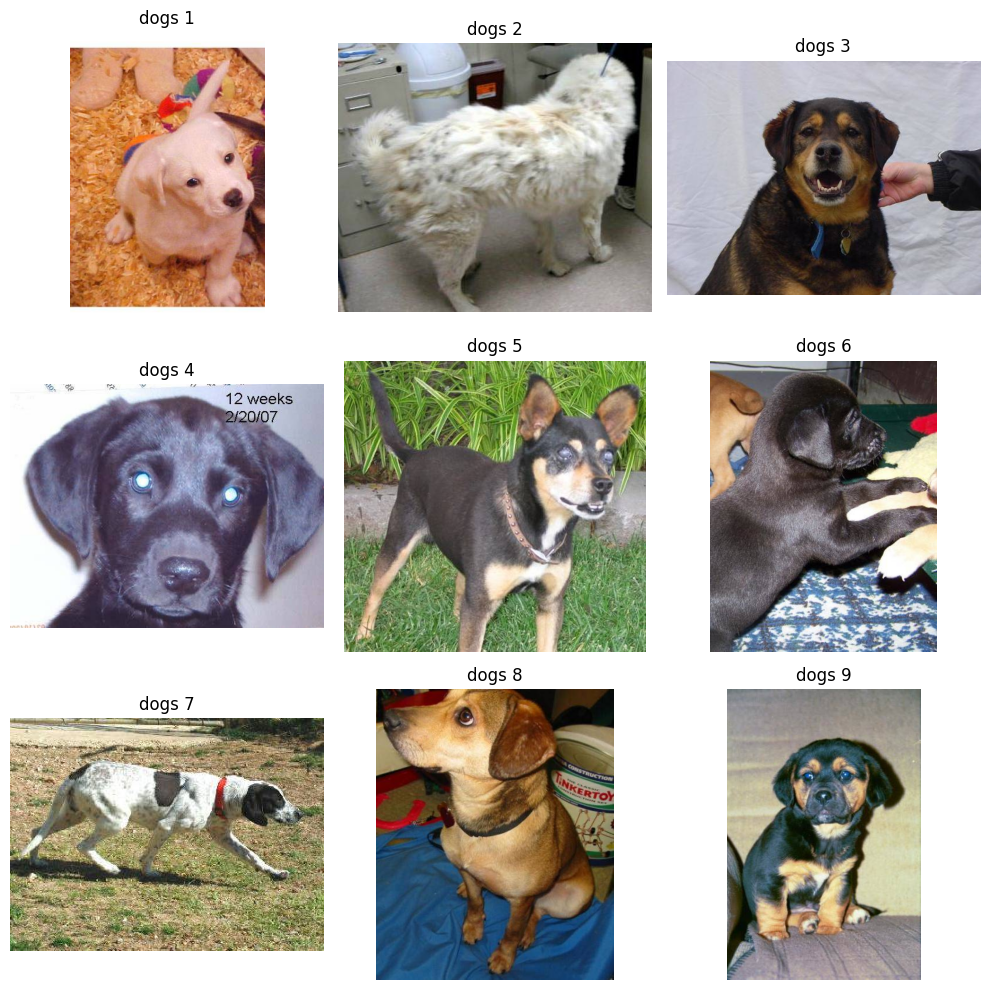

In [ ]:
print("Mostrando 9 imágenes de perros:")
plot_sample_images(train_dir, 'dogs')

Mostrando 9 imágenes de gatos:


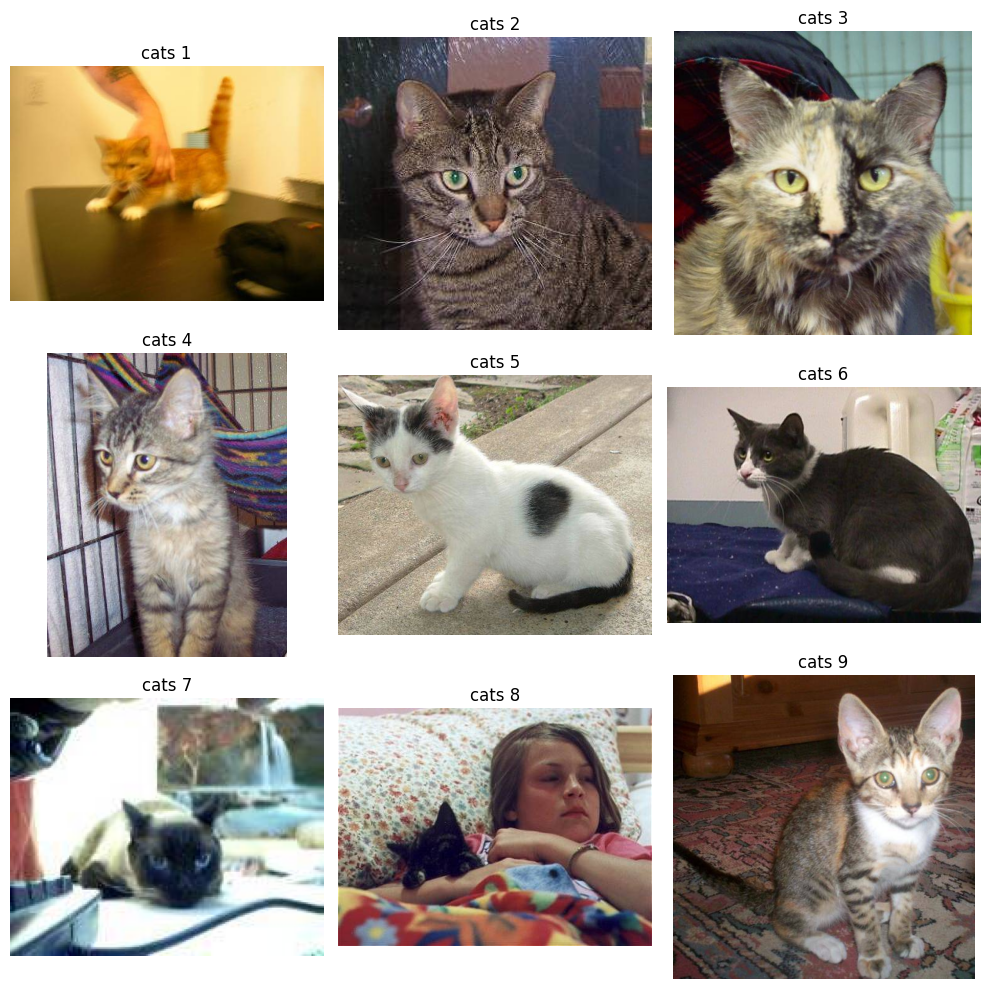

In [ ]:
print("Mostrando 9 imágenes de gatos:")
plot_sample_images(train_dir, 'cats')

In [5]:
#Aqui volvemos a cargar y preprocesamos
def load_and_preprocess_images(directory, categories, target_size=(200, 200), max_per_class=None):
    X = []
    y = []
    
    for idx, category in enumerate(categories):
        path = os.path.join(directory, category)
        class_images = os.listdir(path)
        
        if max_per_class:
            class_images = class_images[:max_per_class]
        
        print(f"Cargando {len(class_images)} imágenes de {category}...")
        
        for img_name in class_images:
            img_path = os.path.join(path, img_name)
            try:
                # Cargar imagen
                img = cv2.imread(img_path)
                if img is None:
                    continue
                
                # Redimensionar a tamaño fijo
                img = cv2.resize(img, target_size)
                
                # Normalizar valores de píxeles a [0,1]
                img = img / 255.0
                
                # Aplanar la imagen para el clasificador
                img_flat = img.flatten()
                
                X.append(img_flat)
                y.append(idx)
            except Exception as e:
                print(f"Error al procesar {img_path}: {e}")
    
    return np.array(X), np.array(y)

In [6]:
# Cargar un subconjunto de imágenes para entrenamiento (evita los problemas de la memoria, aunque se hizo con la bdd mas peque;a )
categories = ['dogs', 'cats']
X_train, y_train = load_and_preprocess_images(train_dir, categories, max_per_class=500)
X_test, y_test = load_and_preprocess_images(test_dir, categories, max_per_class=100)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Etiquetas de entrenamiento: {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}")
print(f"Etiquetas de prueba: {y_test.shape}")

Cargando 14 imágenes de dogs...
Cargando 11 imágenes de cats...
Cargando 20 imágenes de dogs...
Cargando 20 imágenes de cats...
Datos de entrenamiento: (25, 120000)
Etiquetas de entrenamiento: (25,)
Datos de prueba: (40, 120000)
Etiquetas de prueba: (40,)


In [7]:
#normalizamos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#usamos una Cnn para pasar los problemas que se tenian con el tensorflow al principio
print("Entrenando el modelo SVM...")
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)

Entrenando el modelo SVM...


SVC(probability=True)

In [10]:
# Evaluamos
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.5000


In [11]:
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=categories))


Informe de clasificación:
              precision    recall  f1-score   support

        dogs       0.50      0.85      0.63        20
        cats       0.50      0.15      0.23        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.43        40
weighted avg       0.50      0.50      0.43        40



([<matplotlib.axis.YTick at 0x1a152d8ca10>,
 [Text(0, 0, 'dogs'), Text(0, 1, 'cats')])

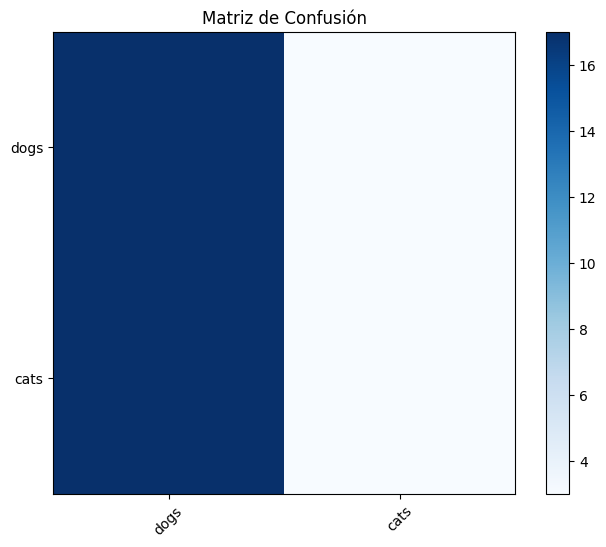

In [ ]:
# Matriz de confusión (esto se ve mejor cuando usamos la bdd completa)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)

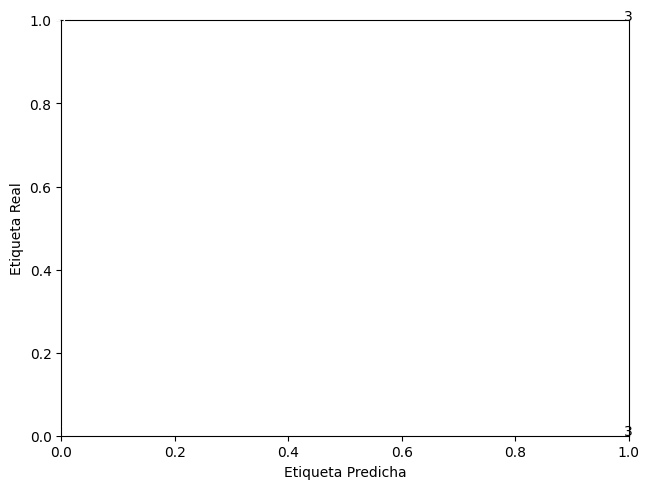

In [ ]:
# Anotar la matriz de confusión (Estos sale mejor cuando usamos la bdd completa)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [14]:
print("Entrenando modelo Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

Entrenando modelo Random Forest...


RandomForestClassifier(random_state=42)

In [15]:
#Evaluamos el modelo Random Forest
rf_y_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Precisión del modelo Random Forest: {rf_accuracy:.4f}")

Precisión del modelo Random Forest: 0.5000


In [16]:
print("\nComparación de modelos:")
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Comparación de modelos:
SVM Accuracy: 0.5000
Random Forest Accuracy: 0.5000


In [17]:
def visualize_predictions(X, y_true, y_pred, categories, indices=None, n_images=5):
    if indices is None:
        indices = np.random.choice(range(len(X)), n_images, replace=False)
    
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        img_flat = X[idx] * 255  # Desnormalizar
        img = img_flat.reshape(200, 200, 3).astype(np.uint8)
        
        plt.subplot(1, n_images, i+1)
        plt.imshow(img)
        plt.title(f"Real: {categories[y_true[idx]]}\nPred: {categories[y_pred[idx]]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


Visualizando predicciones del mejor modelo (SVM):


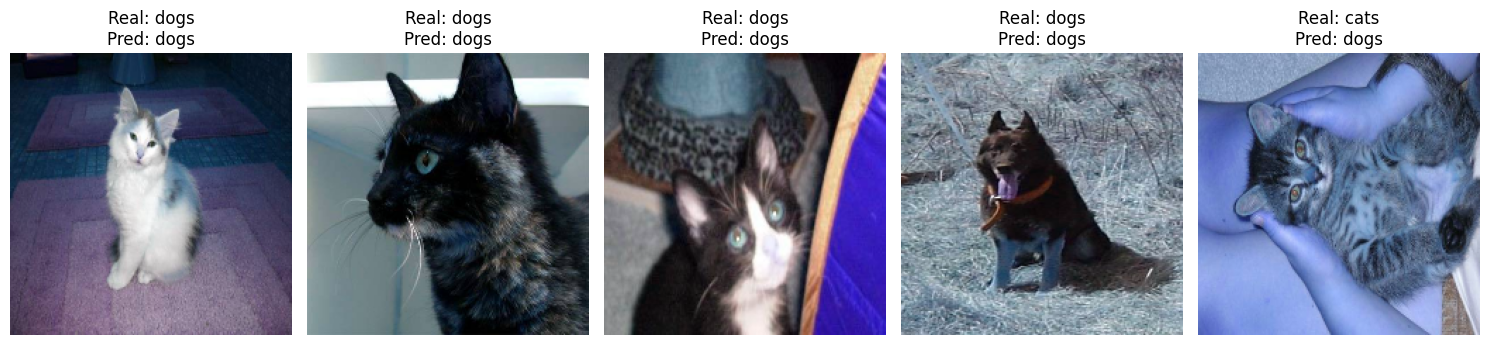

In [18]:
# Visualizamos algunas predicciones del mejor modelo
best_model = rf_model if rf_accuracy > accuracy else svm_model
best_y_pred = rf_y_pred if rf_accuracy > accuracy else y_pred
best_model_name = "Random Forest" if rf_accuracy > accuracy else "SVM"

print(f"\nVisualizando predicciones del mejor modelo ({best_model_name}):")
visualize_predictions(X_test, y_test, best_y_pred, categories)

En esta parte al usar l bdd completa genera las imagenes adecuadas, pero como por motivos de capacidad de maquina no podemos procesar el grueso de la bdd preferia desarrollar el problema. 

In [19]:
import pickle
model_path = r'c:\Users\Marth\OneDrive\Escritorio\4GeeksAcademy\Deep-Learning-Project\models\best_model.pkl'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Mejor modelo guardado en: {model_path}")

Mejor modelo guardado en: c:\Users\Marth\OneDrive\Escritorio\4GeeksAcademy\Deep-Learning-Project\models\best_model.pkl
